<a href="https://colab.research.google.com/github/leenago/Self_studying/blob/master/Statistics/statistics_13%EC%9E%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#13장. 분류예측분석


##13.1 분류예측분석 기초


---
- 기업경영시, 고객의 이탈여부 등과 같은 집단 분류예측 이슈는 항상 존재
- 분류예측분석은 대부분 종속변수가 **명목형 척도**인 경우 해당
- 종속변수가 **명목형 척도**일 경우, 이를 예측하기 위한 다변량 통계분석 기법은 대표적으로 **선형판별분석**과 **로지스틱 회귀분석**이 있음


|분류예측분석의 종류|공통점|차이점|
|:------------------:|:--------:|:--------:|
|선형판별분석|종속변수가 명목형 변수인 경우에 사용함| 독립변수의 척도가 **등간·비율척도**인 경우에 사용가능, 분석의 전제조건이 **까다로움** *(예: 고객의 이탈여부를 파악하기 위해 매출액과 방문빈도 등을 사용하여 분석)*|
|로지스틱 회귀분석|---| 독립변수의 척도에 **제한이 없음**, 분석의 전제조건이 **유연함** *(예: 고객의 이탈여부를 파악하기 위해 방문빈도, 거주지역 등을 사용하여 분석)*|


- 분류예측의 정확도 평가
  - 분류예측을 실행한 결과에 대한 예측정확도는, '목표집단으로 예측된 관측치'와 '실제 해당 집단에 속한 관측치'가 정리된 **분류행렬표**를 작성함으로써 평가 가능


|   |예측 비 이탈|예측 이탈|합계|
|:---:|:---:|:---:|:------:|
|실제 비 이탈|872ⓐ|52ⓑ|924|
|실제 이탈|27ⓒ|49ⓓ|76|
|합계|899|101|1000|

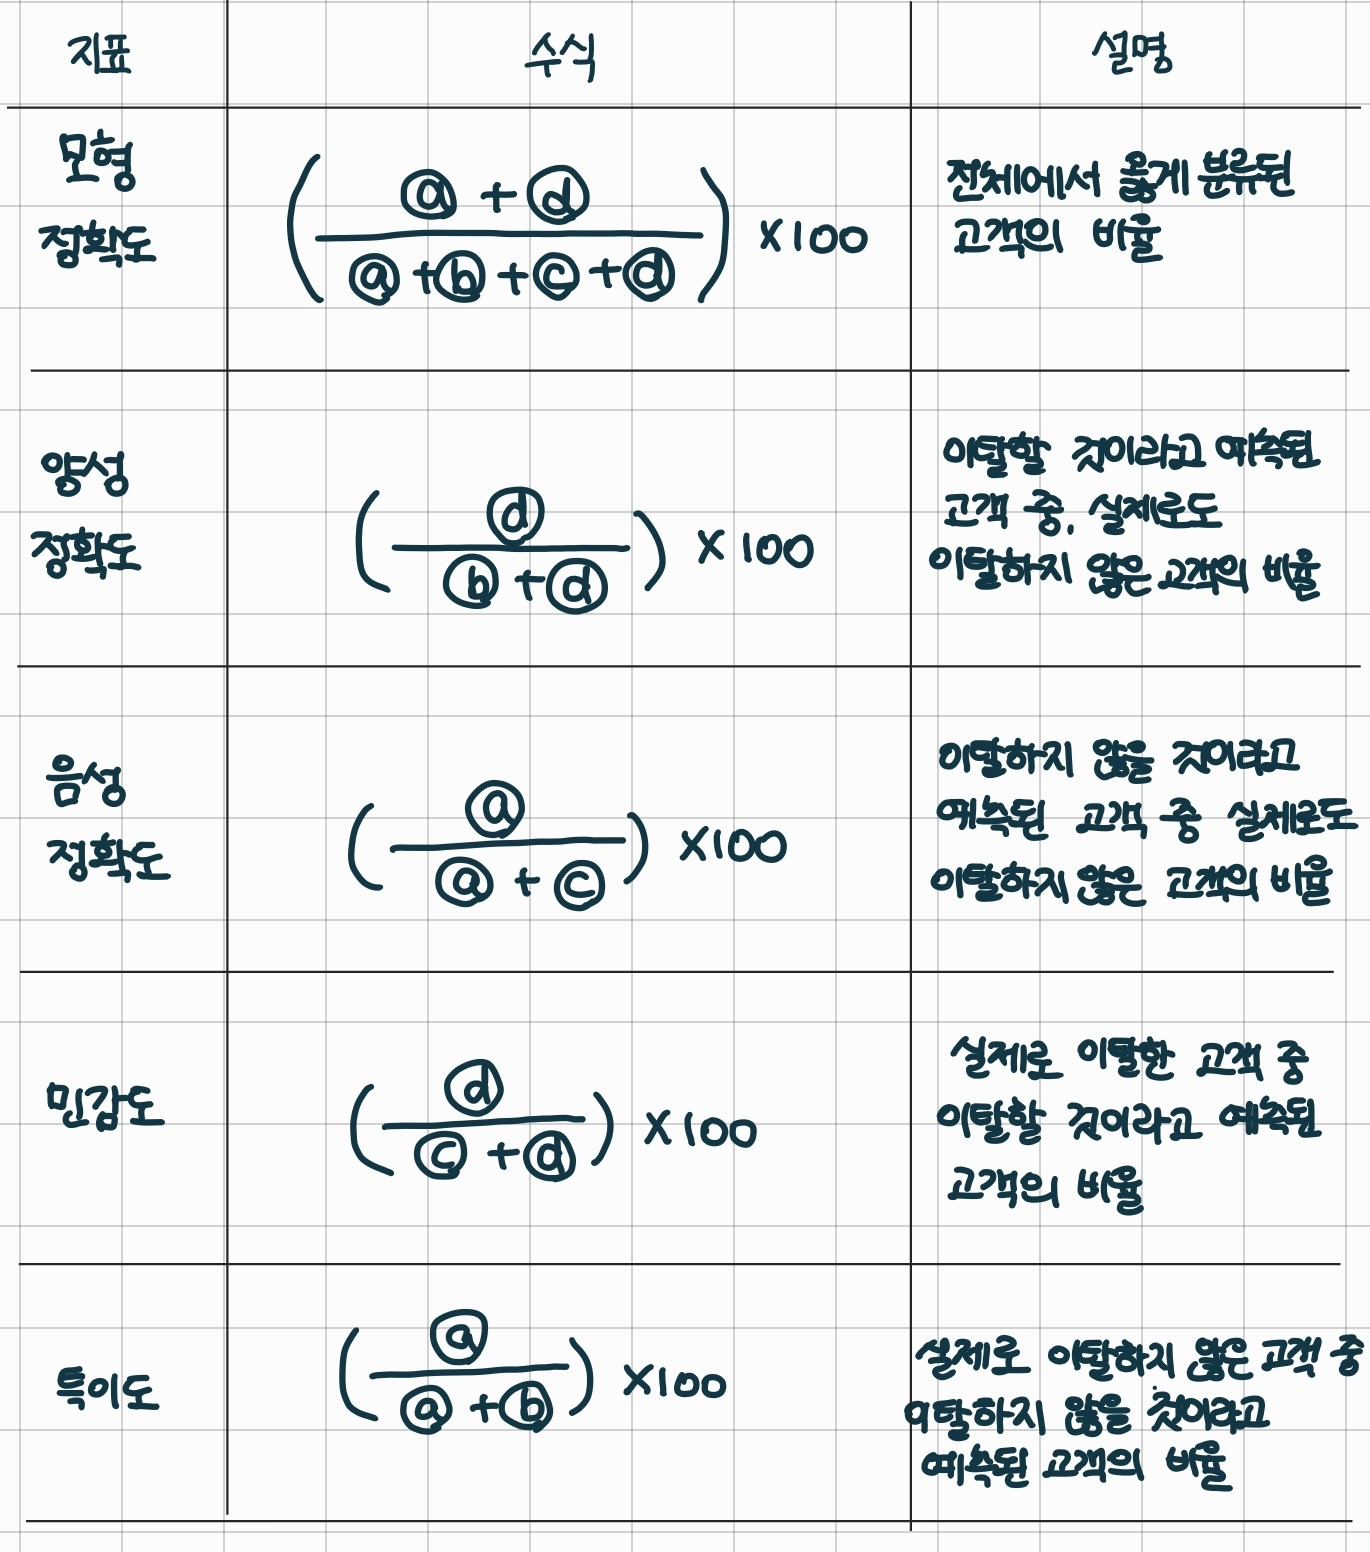

##13.2 선형판별분석
- 선형판별분석(Linear Discriminant Analysis)

  : 이미 분류되어 있는 집단 사이의 차이를 설명할 수 있는 독립변수를 찾아내고, 이 변수들의 선형결합으로 이루어진 판별식 또는 판별함수를 통해 집단을 분류예측할 수 있는 다변량 통계분석 기법


### 1)개념 및 주요 이론

- 선형판별분석은, 독립변수가 **등간·비율척도**로만 구성되어야 함
- 선형판별분석을 위해서는 선형판별식 도출이 필요함

>선형판별식: 두 개 이상의 집단을 구분하는데 있어 분류오류를 최소화 할 수 있는 독립변수들의 함수적인 선형결합모형

>D=W₁X₁+W₂X₂+…+WｐXｐ

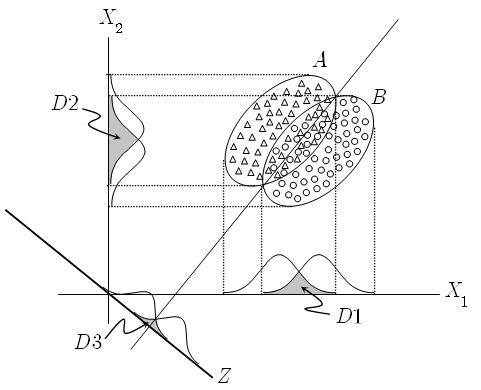
- X1과 X2의 조합으로 Z라는 새로운 차원을 생성한다면, X1이나 X2를 단독적인 기준으로 사용했을 때보다 효과적으로 집단 A,B를 분류 가능
- 선형판별분석은 개별독립변수들의 조합으로 주어진 집단을 효과적으로 분류할 수 있는 새로운 가상의 축(기준)을 형성하는 과정

####선형판별분석을 위한 전제조건

① **독립변수**는 **정규분포**를 따라야 함
  - 독립변수가 정규성을 띄지 않으면, 선형판별식의 예측 정확도가 낮고 분석모형 자체가 유의하게 나오지 않음

② 종속변수와 독립변수는 **상관관계를 가져야**함
  - 선형판별분석은 종속변수와 독립변수간의 상관관계가 존재한다는 가정에서 출발

③ 독립변수들 사이에 상관관계가 **없거나 작아야**함
  - 선형판별분석에서 사용되는 독립변수들간의 상관관계가 높다면 *다중공선성의 문제*가 발생

④ 종속변수로 구분되는 각 집단 별 **공분산 행렬이 유사**해야 함
  - 각 집단의 공분산 행렬이 비슷해야 좋은 분석결과를 얻을 수 있음


---


↔ 실제 

① 기업 수집 데이터는 독립변수들이 정규분포를 따르지 않는 경우가 많음

② 분류하고자 하는 집단간의 공분산 행렬이 유사하지 않은 경우가 많음

### 2) 분석 및 해석

- A쇼핑에서는 고객이탈을 효과적으로 예측하고자 고객들의 거래이력 데이터를 활용하여 선형판별모형 기반의 예측모형을 개발하고자 함
- 독립변수로는 **방문빈도**,**1회 평균 매출액**, **거래기간**을 사용하기로 함
- 가설
  - H0(귀무가설) = 방문빈도와 1회 평균 매출액, 거래기간은 이탈에 영향을 주지 않는다
  - H1(연구가설) = 방문빈도와 1회 평균 매출액, 거래기간은 이탈에 영향을 준다.


####(1) 모듈 및 데이터 탑재

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
%cd /content/gdrive/My Drive/파비통 데이터

/content/gdrive/My Drive/파비통 데이터


In [5]:
import pandas as pd
import numpy as np
# import warnings
# warnings.simplefilter(action='ignore')
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import confusion_matrix
df = pd.read_csv('Ashopping.csv',sep=',',encoding='CP949')

In [6]:
df.head()

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,구매_카테고리_수,거주지역,성별,고객_나이대,거래기간,할인민감여부,멤버쉽_프로그램_가입전_만족도,멤버쉽_프로그램_가입후_만족도,Recency,Frequency,Monetary,상품_만족도,매장_만족도,서비스_만족도,상품_품질,상품_다양성,가격_적절성,상품_진열_위치,상품_설명_표시,매장_청결성,공간_편의성,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성
0,1,0,4007080,17,235711,1,5445,1,4,0,6,6,1,4,1079,0,5,7,7,3,4,6,5,6,7,7,6,7.0,6.0,6,7,6,6,6,6,6,6,6,6
1,2,1,3168400,14,226314,22,350995,2,4,0,4,4,1,1,537,0,2,3,2,3,3,2,5,4,6,7,6,6.0,NaN,7,7,6,6,6,5,3,6,6,6
2,3,0,2680780,18,148932,6,186045,1,4,1,6,6,1,6,1080,0,6,6,7,3,2,4,6,7,6,7,6,7.0,NaN,6,6,6,6,6,7,7,6,6,7
3,4,0,5946600,17,349800,1,5195,1,4,1,5,5,1,6,1019,0,3,5,7,3,5,3,5,5,6,6,6,5.0,6.0,6,6,5,6,6,6,6,6,5,6
4,5,0,13745950,73,188301,9,246350,1,2,0,6,6,0,6,1086,0,5,6,7,6,7,5,6,6,5,6,6,5.0,6.0,5,6,6,6,5,5,6,6,5,6


####(2) 종속변수와 독립변수 구하기

In [7]:
X = df[['방문빈도','1회_평균매출액','거래기간']]
Y = df[['이탈여부']]

####(3) 선형판별분석

In [8]:
lda = LDA().fit(X, Y)
#lda = LDA().fit(X,np.ravel(Y, order='C')) 
#lda = LDA().fit(X,Y.values.ravel())
#X: 독립변수, Y: 종속변수

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


####(4)예측 결과

In [34]:
print('판별식 선형계수: ',np.around(lda.coef_,10))
#np.round: array의 성분을 주어진 소수점 자리로 반올림
print('\n판별식 절편: ', np.around(lda.intercept_,3))
#교재와 값이 다르게 나옴

판별식 선형계수:  [[ 8.57912496e-02  1.02380000e-06 -9.61603449e-02]]

판별식 절편:  [72.916]


- **coef_**와 **intercept_** 밑에 밑줄이 있는 이유

  : 사용자가 지정한 매개변수와 구분을 하기 위해, scikit-learn은 훈련된 데이터에서 유도된 속성 뒤에 밑줄을 붙인다.

In [10]:
print('예측결과:\n', pd.DataFrame(lda.predict(X)))
#predict()함수는 인자를 독립변수로 받기 때문에, 객체 X를 입력

예측결과:
      0
0    0
1    1
2    0
3    0
4    0
..  ..
995  0
996  0
997  0
998  0
999  0

[1000 rows x 1 columns]


In [11]:
print('예측스코어:\n',pd.DataFrame(lda.predict_proba(X)))
#예측스코어는 판별식에 의해 계산된 판별 점수를 의미
#predict_proba 함수를 통해 출력이 가능함

예측스코어:
                 0             1
0    1.000000e+00  2.208135e-13
1    1.370801e-10  1.000000e+00
2    1.000000e+00  1.999582e-13
3    1.000000e+00  7.951807e-11
4    1.000000e+00  1.309479e-11
..            ...           ...
995  1.000000e+00  2.283614e-12
996  1.000000e+00  1.727200e-10
997  1.000000e+00  3.609038e-14
998  1.000000e+00  8.248046e-13
999  1.000000e+00  6.555998e-13

[1000 rows x 2 columns]


In [12]:
print('예측정확도:\n',lda.score(X,Y))

예측정확도:
 0.986


In [13]:
#분류행렬표 출력
cf_m = pd.DataFrame(confusion_matrix(Y,lda.predict(X)))
#confusion_matrix(종속변수, 예측결과)

cf_m.columns=['예측 0','예측 1']
cf_m.index = ['실제 0','실제 1']
print('분류행렬표:\n',cf_m)

분류행렬표:
       예측 0  예측 1
실제 0   921    12
실제 1     2    65


- 예측정확도는 **0.986**으로 매우 높은 정확도를 보임
- 분류행렬표를 이용해 민감도, 특이도 등을 계산해볼 수 있음


---
- 위 분석을 통해 A 쇼핑이 개발한 이탈예측모형

> **D = 72.916+(8.57912496e-02x방문빈도)
+(1.02380000e-06x1회평균매출액)
+(-9.61603449e-02x거래기간)**

- 이 모델을 바탕으로 이탈고객을 예측할 수 있으며, 이탈로 예측된 고객들에 대해서는 차별화된 이탈방지 마케팅을 전개함으로써, 우수고객 유지가 예상됨


##13.3 로지스틱 회귀분석
- 선형판별분석의 전제조건을 실제로 충족하기가 어려움
- 이 때문에, 실제 데이터 분석가는 선형판별분석의 전제조건을 엄격하게 지키지 않아도 적용할 수 있는 분류예측분석 기법인 로지스틱 회귀분석 (Logistic Regression Analysis)을 선호함

### 1)개념 및 주요 이론
- **범주형·명목형 척도**로 구성된 종속 변수에 대해 분류예측을 할 수 있는 다변량 통계기법 중 하나
- 선형함수 대신 **로짓함수(logit function)** 사용
- 등간·비율척도 외에도 **다른 형태의 변수도 독립변수로 사용 가능**
- 판별분석이 가정하는 전제조건을 엄격히 적용하지 않음



####(1)로지스틱 회귀모형

  : 특정 집단 또는 범주에 속할 확률값을 추정함으로써, 관측치가 속할 범주를 예측하기 위한 분석 모형
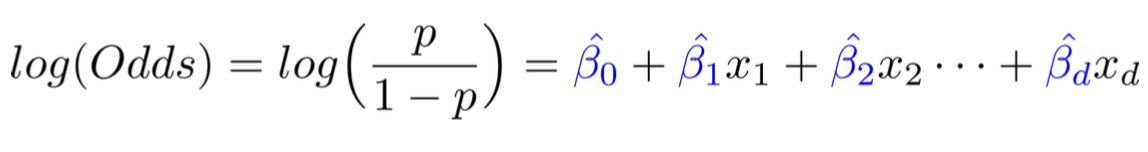

- p: 목표집단에 속할 확률
- 목표집단에 속할 확률과 목표집단에 속하지 않을 확률의 비율에 자연로그를 취한 값을 출력함으로써 분류예측을 수행

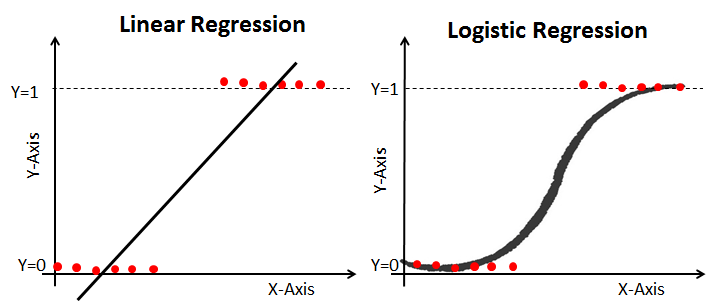

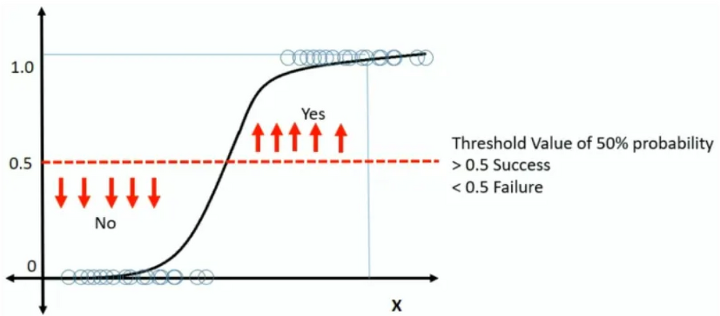


- 분류기준값(cut-off value, 이항로지스틱 회귀분석의 경우 보통 **0.5**)을 설정
- 목표집단에 속할 확률인 P가 분류 기준 값보다 큰 경우 집단 1(목표집단)로, 분류 기준 값보다 작은 경우 집단 0으로 분류  

####(2) 로짓함수와 오즈
- 오즈(Odds): 특정 사건이 발생할 확률(P)과 발생하지 않을 확률(1-P)의 비율
  - 오즈는 항상 양의 값만 가짐

  - 0 < odds < ∞의 범위에 속하기 때문에, 범위의 제약이 존재

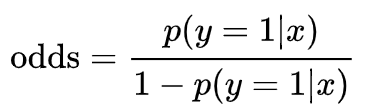

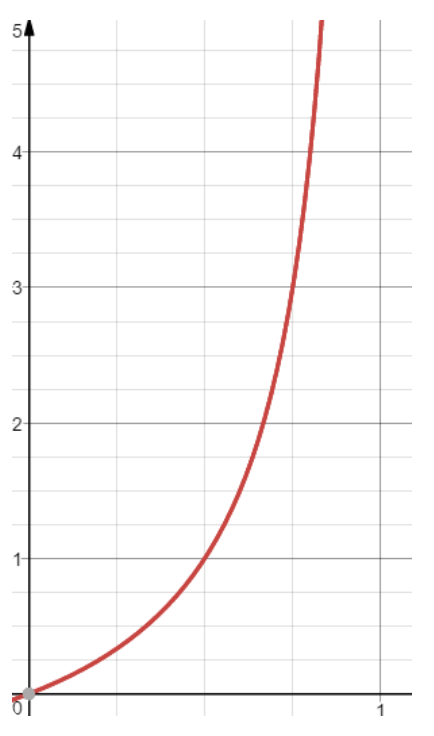


---


- 로짓(Logit): 오즈에 자연로그를 취한 값
  - 오즈 값이 무한대로 커지는 단점을 극복
  - 우항의 독립변수들이 선형관계식을 갖도록 단순화
  - 좌변항이 자연로그를 취하고 있기 때문에, 특정 독립변수의 계수만큼 1단위의 로짓이 증가하는 것
    
        ex) 로지스틱 회귀모형에서 반품횟수가 독립변수, 독립변수의 회귀계수가 0.2인 경우 : 
        반품횟수가 1단위 증가할 때, 오즈가 0.2 증가하는 것이 아니라 오즈비인 'exp(0.2) = 1.22배'만큼 증가
        * 오즈비: 독립변수 X의 로지스틱 회귀계수 β를 exp(β)로 변환한 값

  - 오즈

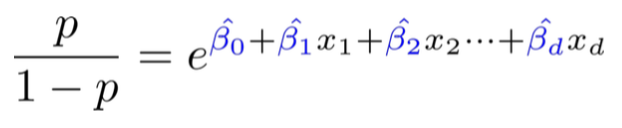

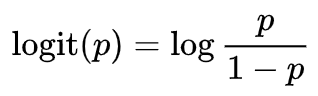

####(3) 로지스틱 회귀계수 추정 방법
- 선형회귀에서는 최소자승법(LSM: Least Squares Method) 사용
- 로지스틱 회귀분석에서는 독립변수에 대한 우도함수(likelihood function)를 최대화하는 **최대우도법(MLE: Maximum Likelihood Estimation)**을 사용하여 회귀계수 추정
    - 우도(likelihood): 주어진 표본이 나타날 모수의 가능성
    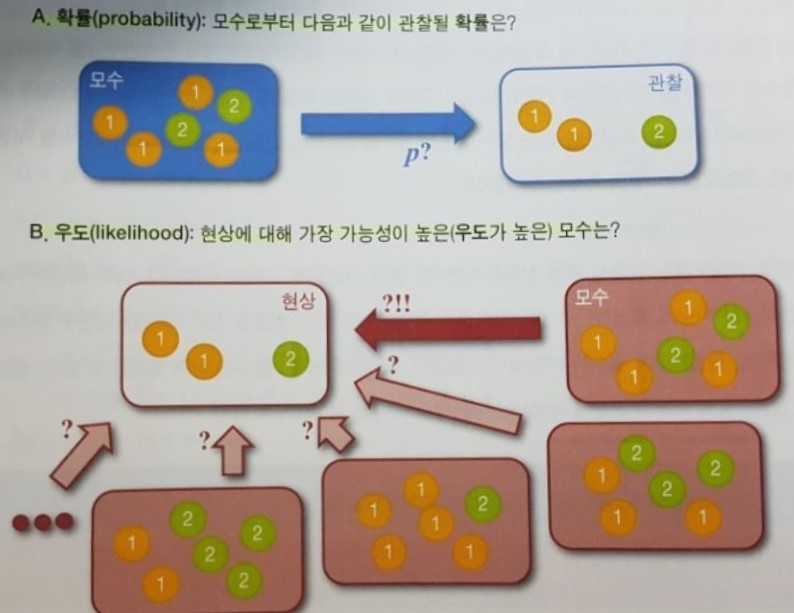

####(4) 로지스틱 회귀모형의 적합도 검정

① 우도비 검정(Log likelihood ratio test)

- 선형회귀모형에서 모형의 적합도를 판정하는 F검정과 유사한 개념
- 회귀모형에 변수를 추가 또는 제거하면서 기존과 새로운 모형에서의 우도 비를 통해 회귀계수의 유의성을 검정하는 방법

  - 우도비의 범위(L): 0≤L≤1
  - -∞< lnL ≤0
  - 0 < -2lnL ≤ ∞

- 모델의 적합도가 좋아질수록 -2lnL은 **0에 가까워지며** 모델의 적합도가 나빠질수록 -2lnL은 **커지게 됨**


② Hosmer & Lemeshow 검정
- 전체 사례들의 확률 값을 순위화하여 10개의 그룹으로 분류 후, 각 그룹의 기대 확률과 실제 관측 확률값을 비교하는 방식으로 카이제곱 검정방식과 유사
- H-L 검정결과, p<0.05일 경우 모델에서 추정된 값은 실측값과 차이가 없다는 귀무가설 기각 / 추정된 로지스틱 회귀모형이 주어진 표본자료에 적합하지 않음을 의미


③ 유사 결정계수(Pseudo - R²)
- 선형 회귀분석에서 종속변수의 분산에 대한 설명력을 나타내는 결정계수 (R²)의 개념에 로그우도함수 값을 취한 결정계수
- 유사결정계수 역시 0과 1 사이의 값으로 산출
 - 1- (lnLm / lnL0)

- 1에 가까울수록 좋은 모형 적합도를 가짐
  

###2) 분석 및 해석

- 이탈예측모형을 만들기 위해 '거래기간' , 'Recency(최근 구매성)' , '성별'을 사용하고자 함
- 독립변수 중 성별은 명목척도이므로, 로지스틱 회귀분석을 사용
- 가설
  - H0(귀무가설) = 거래기간, Recency, 성별은 이탈에 영향을 주지 않는다.
  - H1(연구가설) = 거래기간, Recency, 성별은 이탈에 영향을 준다.

####(1) 모듈 및 데이터 탑재

In [14]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
pd.options.display.float_format = '{:.3f}'.format
df = pd.read_csv('Ashopping.csv',sep=',',encoding="CP949")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [15]:
#더미변수 생성하기
df2 = pd.get_dummies(df['성별'],prefix='성별',drop_first=False)
df3 = pd.concat([df,df2], axis=1)

In [29]:
#종속변수와 독립변수 구분하기
df3['intercept'] = 1.0
x = df3[['intercept','거래기간','Recency','성별_0']]
y = df3[['이탈여부']]

In [30]:
#로지스틱 회귀분석 실행하기
logit = sm.Logit(y,x).fit()

Optimization terminated successfully.
         Current function value: 0.015583
         Iterations 12


In [31]:
#분석결과 출력하기
print(logit.summary2())
print("오즈비:\n", np.exp(logit.params))

                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.937     
Dependent Variable: 이탈여부             AIC:              39.1656   
Date:               2020-11-03 07:19 BIC:              58.7966   
No. Observations:   1000             Log-Likelihood:   -15.583   
Df Model:           3                LL-Null:          -245.81   
Df Residuals:       996              LLR p-value:      1.7725e-99
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     12.0000                                      
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
intercept     19.1980    4.0839   4.7009  0.0000  11.1937  27.2022
거래기간          -0.0204    0.0052  -3.9300  0.0001  -0.0306  -0.0102
Recency       -1.2554    0.3561  -3.5257  0.0004  -1.9533  -0.5575
성별_0          -2.0203    1.219

In [19]:
cf_m2 = pd.DataFrame(logit.pred_table())
cf_m2.columns = ['예측 0','예측 1']
cf_m2.index = ['실제 0','실제 1']
print('분류행렬표:\n',cf_m2)

분류행렬표:
         예측 0   예측 1
실제 0 930.000  3.000
실제 1   3.000 64.000


- 모형의 정확도는 99.4%로, 매우 높은 정확도를 보임
  - 모형정확도 = (ⓐ+ⓓ  ⓐ+ⓑ+ⓒ+ⓓ)*100
- 유사결정계수의 값이 0.936으로 매우 좋은 적합도를 보임

- 오즈비 테이블에서는 각 변수의 값 모두 1보다 작으므로, 변수의 값이 1단위 커질 때마다 이탈확률이 낮아짐을 알 수 있음

- 독립변수의 영향력은 성별 > Recency > 거래기간 순서로 이탈위험도에 부정적 영향을 미침
  - 남성, 구매 최근성이 떨어지고, 총 거래기간 오래된 고객일수록 이탈위험도가 높기 때문에, 이런 고객들에 대한 선별적 이탈방지 활동이 필요

[참고](https://tensorflow.blog/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/2-3-3-%EC%84%A0%ED%98%95-%EB%AA%A8%EB%8D%B8/)

[사진자료 출처](https://soobarkbar.tistory.com/12)
[사진자료 출처](https://m.blog.naver.com/PostView.nhn?blogId=nisekim&logNo=221283419961&proxyReferer=https:%2F%2Fwww.google.com%2F)